In [13]:
import numpy as np
# Define initial weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05
X=np.load(r"C:\Users\Srikanth\Downloads\ML\ML-lab3-main\activation_maps_lines_image52_pixel.npy")
y=np.load(r"C:\Users\Srikanth\Downloads\ML\ML-lab3-main\activation_maps_lines_image52_labelpixel.npy")
# Training data (you can replace this with your own dataset)
# Here, we use a simple AND gate as an example.
inputs = [[row[0], row[1]] for row in X]

# Target values
targets = y

def activate(sum):
    return 1 if sum >= 0 else 0

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for x1, x2, target in data:
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Calculate the error
            error = target - activate(weighted_sum)
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return weights, errors

# Train the perceptron and collect errors
trained_weights, error_values = train_perceptron([W0, W1, W2], learning_rate,100, data)

# Print the trained weights
print("Trained Weights:")
print(f"W0: {trained_weights[0]}, W1: {trained_weights[1]}, W2: {trained_weights[2]}")

# Test the perceptron
def test_perceptron(weights, data):
    correct = 0
    for x1, x2, target in data:
        weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
        prediction = activate(weighted_sum)
        if prediction == target:
            correct += 1
        print(f"Input: ({x1}, {x2}), Target: {target}, Prediction: {prediction}")
    accuracy = (correct / len(data)) * 100
    print(f"Accuracy: {accuracy}%")

# Test the trained perceptron
print("\nTesting the Trained Perceptron:")
test_perceptron(trained_weights, data)

Trained Weights:
W0: 1.6999999999999933, W1: -1.6000000000000008, W2: -1.6000000000000005

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 0, Prediction: 1
Input: (1, 0), Target: 0, Prediction: 1
Input: (1, 1), Target: 1, Prediction: 0
Accuracy: 0.0%


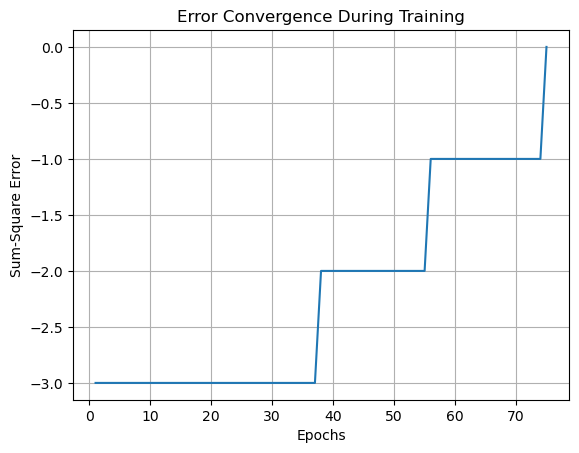

In [10]:
import matplotlib.pyplot
plt.plot(range(1, len(error_values) + 1), error_values)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Error Convergence During Training')
plt.grid(True)
plt.show()